In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data_hybrid_descriptors.csv')
data.head()

,Name,id,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7,Yield_2h,Yield_12h,Class
0,4CzIPN,3a,-0.20639,-0.08880,3.2630,0.1845,3.0330,0.2300,5.026309,2.302462,-4.098158,2.645094,2.165571,0.810414,-1.836163,1.698044,56,87,good
1,4tBuCzIPN,3b,-0.19621,-0.08203,3.1893,0.1220,2.9803,0.2090,14.340615,-3.190789,-6.166707,-2.363734,-4.922239,3.059227,3.411225,0.540899,49,84,good
2,4MeCzIPN,3c,-0.19686,-0.08286,3.1738,0.1882,2.9538,0.2200,7.739330,1.067291,-4.527043,1.044420,0.473656,1.435541,-0.471302,1.292435,45,86,good
3,4BrCzIPN,3d,-0.22360,-0.11433,3.1934,0.1257,3.0271,0.1663,9.297674,1.498317,-0.902181,2.604148,5.683587,2.231169,5.946085,-0.294566,83,88,very_good
4,4OMeCzIPN,3e,-0.18540,-0.07855,3.0450,0.1673,2.8555,0.1895,11.557462,16.313292,4.146564,-3.224873,-5.143811,-1.953017,-0.614755,-0.966040,0,78,bad


In [3]:
# DFT_yield
data1 = data.drop(columns = ['Name', 'id', 'Class', 'RDKit_0', 'RDKit_1', 'RDKit_2', 'RDKit_3',
                            'RDKit_4', 'RDKit_5', 'RDKit_6', 'RDKit_7'])
data1.head()

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,Yield_2h,Yield_12h
0,-0.20639,-0.08880,3.2630,0.1845,3.0330,0.2300,56,87
1,-0.19621,-0.08203,3.1893,0.1220,2.9803,0.2090,49,84
2,-0.19686,-0.08286,3.1738,0.1882,2.9538,0.2200,45,86
3,-0.22360,-0.11433,3.1934,0.1257,3.0271,0.1663,83,88
4,-0.18540,-0.07855,3.0450,0.1673,2.8555,0.1895,0,78


In [4]:
corr_matrix1 = data1.corr()
corr_matrix1

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,Yield_2h,Yield_12h
HOMO,1.000000,0.839917,-0.058680,0.210946,-0.356144,0.495601,-0.253561,-0.258735
LUMO,0.839917,1.000000,0.408179,0.461068,0.016357,0.586231,-0.224612,-0.099127
E_S1,-0.058680,0.408179,1.000000,0.512794,0.800704,0.189508,-0.145048,0.167795
f_S1,0.210946,0.461068,0.512794,1.000000,0.145996,0.530868,0.137829,0.238295
E_T1,-0.356144,0.016357,0.800704,0.145996,1.000000,-0.436464,0.028468,0.344018
dEST,0.495601,0.586231,0.189508,0.530868,-0.436464,1.000000,-0.264506,-0.311847
Yield_2h,-0.253561,-0.224612,-0.145048,0.137829,0.028468,-0.264506,1.000000,0.576690
Yield_12h,-0.258735,-0.099127,0.167795,0.238295,0.344018,-0.311847,0.576690,1.000000


In [5]:
corr_matrix1_abs = data1.corr().abs()
corr_matrix1_abs

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,Yield_2h,Yield_12h
HOMO,1.000000,0.839917,0.058680,0.210946,0.356144,0.495601,0.253561,0.258735
LUMO,0.839917,1.000000,0.408179,0.461068,0.016357,0.586231,0.224612,0.099127
E_S1,0.058680,0.408179,1.000000,0.512794,0.800704,0.189508,0.145048,0.167795
f_S1,0.210946,0.461068,0.512794,1.000000,0.145996,0.530868,0.137829,0.238295
E_T1,0.356144,0.016357,0.800704,0.145996,1.000000,0.436464,0.028468,0.344018
dEST,0.495601,0.586231,0.189508,0.530868,0.436464,1.000000,0.264506,0.311847
Yield_2h,0.253561,0.224612,0.145048,0.137829,0.028468,0.264506,1.000000,0.576690
Yield_12h,0.258735,0.099127,0.167795,0.238295,0.344018,0.311847,0.576690,1.000000


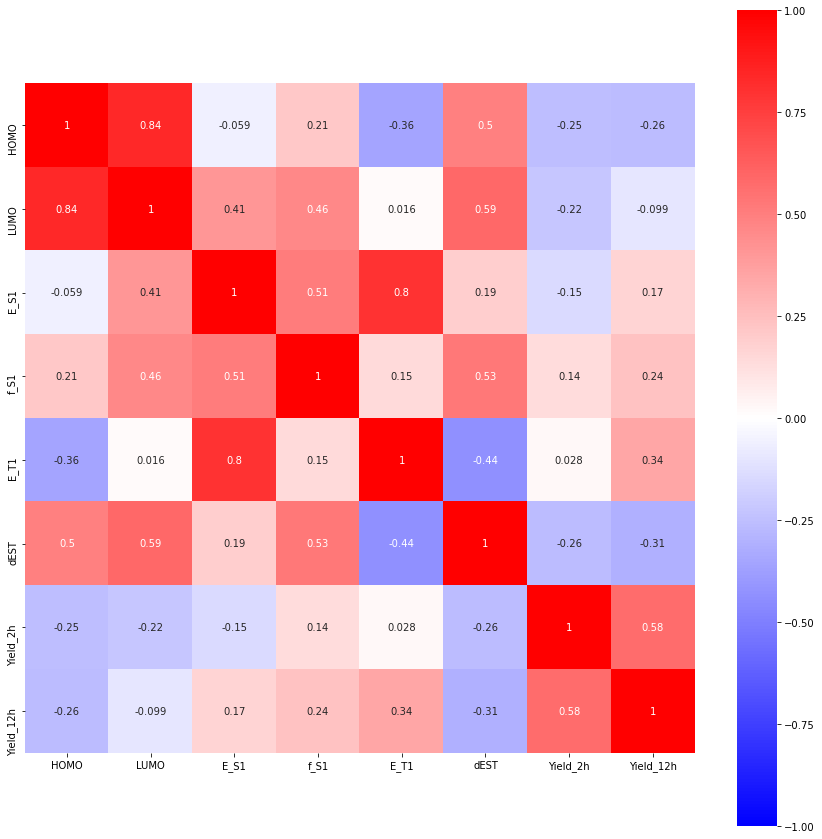

In [6]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(corr_matrix1, annot=True, square=True, cmap="bwr",vmin=-1, vmax=1)
ax.set_aspect('equal', adjustable='box')
plt.show()
fig.savefig("result/correlation_DFT_yield.pdf")

In [7]:
corr_matrix1_abs.to_csv("result/correlation_abs_DFT_yield.csv")

In [8]:
# RDKit_yield
data2 = data.drop(columns = ['Name', 'id', 'Class', 'HOMO', 'LUMO', 'E_S1', 'f_S1', 'E_T1', 'dEST'])
data2.head()

,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7,Yield_2h,Yield_12h
0,5.026309,2.302462,-4.098158,2.645094,2.165571,0.810414,-1.836163,1.698044,56,87
1,14.340615,-3.190789,-6.166707,-2.363734,-4.922239,3.059227,3.411225,0.540899,49,84
2,7.739330,1.067291,-4.527043,1.044420,0.473656,1.435541,-0.471302,1.292435,45,86
3,9.297674,1.498317,-0.902181,2.604148,5.683587,2.231169,5.946085,-0.294566,83,88
4,11.557462,16.313292,4.146564,-3.224873,-5.143811,-1.953017,-0.614755,-0.966040,0,78


In [9]:
corr_matrix2 = data2.corr()
corr_matrix2

,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7,Yield_2h,Yield_12h
RDKit_0,1.000000e+00,-1.127338e-14,5.726326e-15,-1.530676e-16,1.935441e-17,2.337037e-16,-3.650367e-17,-2.690256e-16,0.498854,0.338018
RDKit_1,-1.127338e-14,1.000000e+00,4.912171e-16,-5.989231e-16,-2.338151e-16,-1.248723e-16,5.615348e-16,-3.402778e-16,-0.285256,0.006499
RDKit_2,5.726326e-15,4.912171e-16,1.000000e+00,-8.668144e-17,-3.420813e-16,-8.851325e-17,1.687465e-16,-1.071881e-17,0.069574,-0.094770
RDKit_3,-1.530676e-16,-5.989231e-16,-8.668144e-17,1.000000e+00,5.270978e-16,3.225347e-17,-8.660231e-16,8.277963e-16,-0.104995,-0.155636
RDKit_4,1.935441e-17,-2.338151e-16,-3.420813e-16,5.270978e-16,1.000000e+00,3.857725e-16,2.112997e-18,2.634758e-16,0.258771,0.373232
RDKit_5,2.337037e-16,-1.248723e-16,-8.851325e-17,3.225347e-17,3.857725e-16,1.000000e+00,-4.109406e-16,5.534788e-16,-0.090002,0.031883
RDKit_6,-3.650367e-17,5.615348e-16,1.687465e-16,-8.660231e-16,2.112997e-18,-4.109406e-16,1.000000e+00,1.065459e-16,0.059253,0.099886
RDKit_7,-2.690256e-16,-3.402778e-16,-1.071881e-17,8.277963e-16,2.634758e-16,5.534788e-16,1.065459e-16,1.000000e+00,0.188494,0.036152
Yield_2h,4.988539e-01,-2.852563e-01,6.957447e-02,-1.049947e-01,2.587705e-01,-9.000193e-02,5.925260e-02,1.884941e-01,1.000000,0.576690
Yield_12h,3.380177e-01,6.498865e-03,-9.476968e-02,-1.556356e-01,3.732321e-01,3.188286e-02,9.988567e-02,3.615150e-02,0.576690,1.000000


In [10]:
corr_matrix2_abs = data2.corr().abs()
corr_matrix2_abs

,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7,Yield_2h,Yield_12h
RDKit_0,1.000000e+00,1.127338e-14,5.726326e-15,1.530676e-16,1.935441e-17,2.337037e-16,3.650367e-17,2.690256e-16,0.498854,0.338018
RDKit_1,1.127338e-14,1.000000e+00,4.912171e-16,5.989231e-16,2.338151e-16,1.248723e-16,5.615348e-16,3.402778e-16,0.285256,0.006499
RDKit_2,5.726326e-15,4.912171e-16,1.000000e+00,8.668144e-17,3.420813e-16,8.851325e-17,1.687465e-16,1.071881e-17,0.069574,0.094770
RDKit_3,1.530676e-16,5.989231e-16,8.668144e-17,1.000000e+00,5.270978e-16,3.225347e-17,8.660231e-16,8.277963e-16,0.104995,0.155636
RDKit_4,1.935441e-17,2.338151e-16,3.420813e-16,5.270978e-16,1.000000e+00,3.857725e-16,2.112997e-18,2.634758e-16,0.258771,0.373232
RDKit_5,2.337037e-16,1.248723e-16,8.851325e-17,3.225347e-17,3.857725e-16,1.000000e+00,4.109406e-16,5.534788e-16,0.090002,0.031883
RDKit_6,3.650367e-17,5.615348e-16,1.687465e-16,8.660231e-16,2.112997e-18,4.109406e-16,1.000000e+00,1.065459e-16,0.059253,0.099886
RDKit_7,2.690256e-16,3.402778e-16,1.071881e-17,8.277963e-16,2.634758e-16,5.534788e-16,1.065459e-16,1.000000e+00,0.188494,0.036152
Yield_2h,4.988539e-01,2.852563e-01,6.957447e-02,1.049947e-01,2.587705e-01,9.000193e-02,5.925260e-02,1.884941e-01,1.000000,0.576690
Yield_12h,3.380177e-01,6.498865e-03,9.476968e-02,1.556356e-01,3.732321e-01,3.188286e-02,9.988567e-02,3.615150e-02,0.576690,1.000000


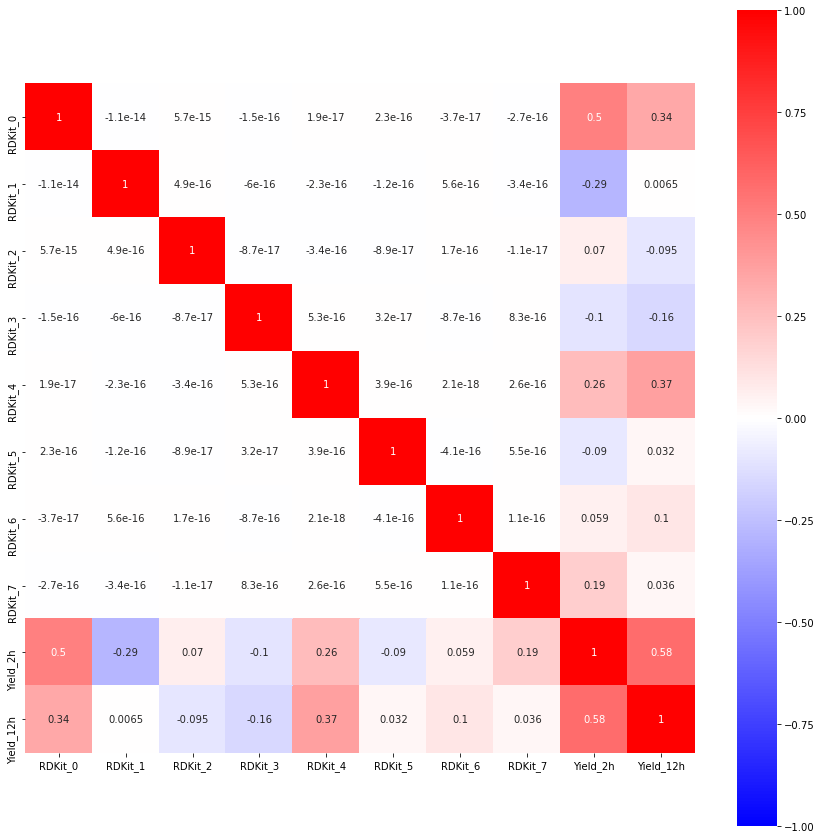

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(corr_matrix2, annot=True, square=True, cmap="bwr",vmin=-1, vmax=1)
ax.set_aspect('equal', adjustable='box')
plt.show()
fig.savefig("result/correlation_RDKit_yield.pdf")

In [12]:
corr_matrix2_abs.to_csv("result/correlation_abs_RDKit_yield.csv")

In [13]:
# cross-correlation between DFT and RDKit descriptors
data3 = data.drop(columns = ['Name', 'id', 'Class', 'Yield_2h', 'Yield_12h'])
data3.head()

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7
0,-0.20639,-0.08880,3.2630,0.1845,3.0330,0.2300,5.026309,2.302462,-4.098158,2.645094,2.165571,0.810414,-1.836163,1.698044
1,-0.19621,-0.08203,3.1893,0.1220,2.9803,0.2090,14.340615,-3.190789,-6.166707,-2.363734,-4.922239,3.059227,3.411225,0.540899
2,-0.19686,-0.08286,3.1738,0.1882,2.9538,0.2200,7.739330,1.067291,-4.527043,1.044420,0.473656,1.435541,-0.471302,1.292435
3,-0.22360,-0.11433,3.1934,0.1257,3.0271,0.1663,9.297674,1.498317,-0.902181,2.604148,5.683587,2.231169,5.946085,-0.294566
4,-0.18540,-0.07855,3.0450,0.1673,2.8555,0.1895,11.557462,16.313292,4.146564,-3.224873,-5.143811,-1.953017,-0.614755,-0.966040


In [14]:
corr_matrix3 = data3.corr()
corr_matrix3

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7
HOMO,1.000000,0.839917,-0.058680,0.210946,-0.356144,0.495601,-3.234673e-01,-1.623206e-01,2.540791e-02,-4.585410e-01,-3.702201e-01,-3.095731e-01,-4.200367e-01,-3.935546e-01
LUMO,0.839917,1.000000,0.408179,0.461068,0.016357,0.586231,-5.288732e-01,-2.570867e-01,-7.995011e-03,-3.502396e-01,-2.680364e-01,-1.773365e-01,-2.519266e-01,-3.487720e-01
E_S1,-0.058680,0.408179,1.000000,0.512794,0.800704,0.189508,-5.540483e-01,1.047574e-02,-2.864494e-01,1.450976e-01,5.803287e-02,2.024028e-01,2.449183e-01,-1.065999e-01
f_S1,0.210946,0.461068,0.512794,1.000000,0.145996,0.530868,-3.451227e-01,-6.852221e-02,-1.552762e-02,6.477693e-02,-1.219787e-01,-2.746282e-01,2.244447e-01,-1.355234e-01
E_T1,-0.356144,0.016357,0.800704,0.145996,1.000000,-0.436464,-1.459712e-01,1.678892e-01,-2.835007e-01,2.792426e-01,1.304413e-01,3.411166e-01,2.295594e-01,-6.533356e-02
dEST,0.495601,0.586231,0.189508,0.530868,-0.436464,1.000000,-5.928677e-01,-2.594427e-01,3.445175e-02,-2.397675e-01,-1.266387e-01,-2.551150e-01,-8.415302e-03,-5.301738e-02
RDKit_0,-0.323467,-0.528873,-0.554048,-0.345123,-0.145971,-0.592868,1.000000e+00,-1.127338e-14,5.726326e-15,-1.530676e-16,1.935441e-17,2.337037e-16,-3.650367e-17,-2.690256e-16
RDKit_1,-0.162321,-0.257087,0.010476,-0.068522,0.167889,-0.259443,-1.127338e-14,1.000000e+00,4.912171e-16,-5.989231e-16,-2.338151e-16,-1.248723e-16,5.615348e-16,-3.402778e-16
RDKit_2,0.025408,-0.007995,-0.286449,-0.015528,-0.283501,0.034452,5.726326e-15,4.912171e-16,1.000000e+00,-8.668144e-17,-3.420813e-16,-8.851325e-17,1.687465e-16,-1.071881e-17
RDKit_3,-0.458541,-0.350240,0.145098,0.064777,0.279243,-0.239768,-1.530676e-16,-5.989231e-16,-8.668144e-17,1.000000e+00,5.270978e-16,3.225347e-17,-8.660231e-16,8.277963e-16


In [15]:
corr_matrix3_abs = data3.corr().abs()
corr_matrix3_abs

,HOMO,LUMO,E_S1,f_S1,E_T1,dEST,RDKit_0,RDKit_1,RDKit_2,RDKit_3,RDKit_4,RDKit_5,RDKit_6,RDKit_7
HOMO,1.000000,0.839917,0.058680,0.210946,0.356144,0.495601,3.234673e-01,1.623206e-01,2.540791e-02,4.585410e-01,3.702201e-01,3.095731e-01,4.200367e-01,3.935546e-01
LUMO,0.839917,1.000000,0.408179,0.461068,0.016357,0.586231,5.288732e-01,2.570867e-01,7.995011e-03,3.502396e-01,2.680364e-01,1.773365e-01,2.519266e-01,3.487720e-01
E_S1,0.058680,0.408179,1.000000,0.512794,0.800704,0.189508,5.540483e-01,1.047574e-02,2.864494e-01,1.450976e-01,5.803287e-02,2.024028e-01,2.449183e-01,1.065999e-01
f_S1,0.210946,0.461068,0.512794,1.000000,0.145996,0.530868,3.451227e-01,6.852221e-02,1.552762e-02,6.477693e-02,1.219787e-01,2.746282e-01,2.244447e-01,1.355234e-01
E_T1,0.356144,0.016357,0.800704,0.145996,1.000000,0.436464,1.459712e-01,1.678892e-01,2.835007e-01,2.792426e-01,1.304413e-01,3.411166e-01,2.295594e-01,6.533356e-02
dEST,0.495601,0.586231,0.189508,0.530868,0.436464,1.000000,5.928677e-01,2.594427e-01,3.445175e-02,2.397675e-01,1.266387e-01,2.551150e-01,8.415302e-03,5.301738e-02
RDKit_0,0.323467,0.528873,0.554048,0.345123,0.145971,0.592868,1.000000e+00,1.127338e-14,5.726326e-15,1.530676e-16,1.935441e-17,2.337037e-16,3.650367e-17,2.690256e-16
RDKit_1,0.162321,0.257087,0.010476,0.068522,0.167889,0.259443,1.127338e-14,1.000000e+00,4.912171e-16,5.989231e-16,2.338151e-16,1.248723e-16,5.615348e-16,3.402778e-16
RDKit_2,0.025408,0.007995,0.286449,0.015528,0.283501,0.034452,5.726326e-15,4.912171e-16,1.000000e+00,8.668144e-17,3.420813e-16,8.851325e-17,1.687465e-16,1.071881e-17
RDKit_3,0.458541,0.350240,0.145098,0.064777,0.279243,0.239768,1.530676e-16,5.989231e-16,8.668144e-17,1.000000e+00,5.270978e-16,3.225347e-17,8.660231e-16,8.277963e-16


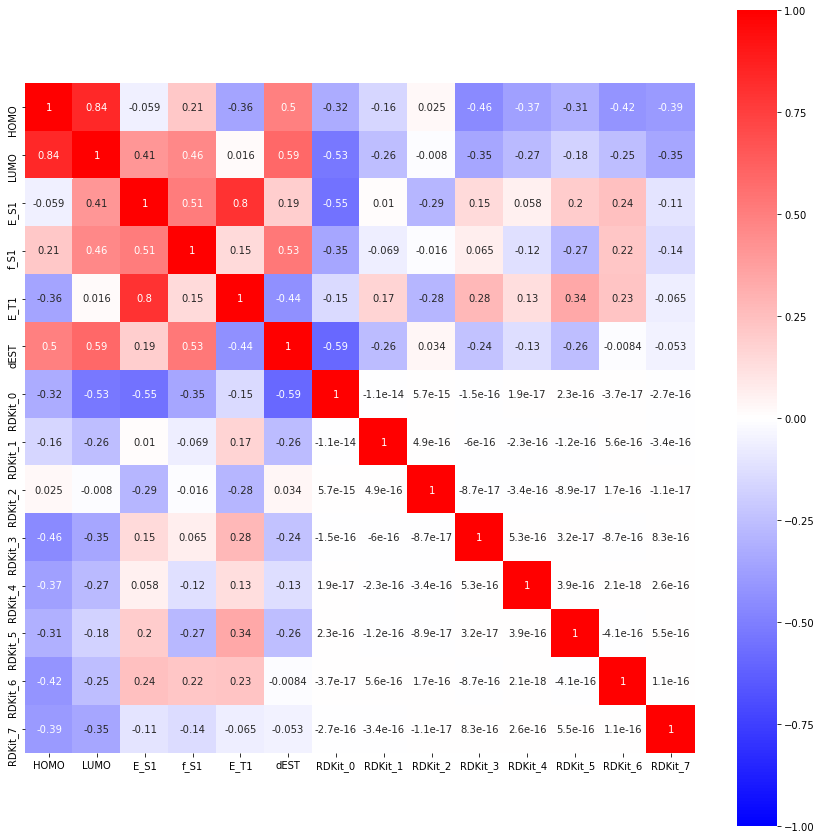

In [16]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(corr_matrix3, annot=True, square=True, cmap="bwr",vmin=-1, vmax=1)
ax.set_aspect('equal', adjustable='box')
plt.show()
fig.savefig("result/crosscorrelation_DFT_RDKit.pdf")

In [17]:
corr_matrix3_abs.to_csv("result/crosscorrelation_abs_DFT_RDKit.csv")